## Phase 1: Data preprocessing

<div style="border: 2px solid #ff0000ff; border-radius: 10px; padding: 10px; display: inline-block; width: 90%; box-sizing: border-box;">

- **Phase inputs**
	- ???

- **Phase outputs**
	- `panel_1min.parquet`: Panel of stock financial informations
</div>

In [1]:
import polars as pl
from main_preprocessing import main_1

panel = main_1()

print(f"Panel shape: {panel.shape}")
print(f"\nPanel columns: {panel.columns}")
print(f"\nFirst few rows:")
panel.head()

/Users/cyprien/anaconda3/envs/fbdenv/lib/python3.14/site-packages/polars/_cpu_check.py:255: RuntimeWarning: Missing required CPU features.

The following required CPU features were not detected:
    avx, avx2, fma, bmi1, bmi2, lzcnt, movbe
Continuing to use this version of Polars on this processor will likely result in a crash.
Install `polars[rtcompat]` instead of `polars` to run Polars with better compatibility.

Hint: If you are on an Apple ARM machine (e.g. M1) this is likely due to running Python under Rosetta.
It is recommended to install a native version of Python that does not run under Rosetta x86-64 emulation.

If you believe this warning to be a false positive, you can set the `POLARS_SKIP_CPU_CHECK` environment variable to bypass this check.

  warnings.warn(


Initializing data preprocessor...

Step 1: Processing/Loading cleaned assets...
PROCESSING 85 ASSETS
Date filter: 2008-09-01 to 2008-12-31
Files already cleaned: 0
Files to process: 85

Checking timestamps in raw data files...


: 

: 

## Phase 2: Formatting and NaN handling

<div style="border: 2px solid #ff0000ff; border-radius: 10px; padding: 10px; display: inline-block; width: 90%; box-sizing: border-box;">

- **Phase inputs**
	- `panel_1min.parquet`: Panel of stock financial informations

- **Phase outputs**
	- `stock_prices.csv`: DataFrame of asset prices, cleaned
	- `stock_returns.csv`: DataFrame of asset returns, cleaned
	- `stock_spreads.csv`: DataFrame of asset prices spreads, cleaned
</div>

In [1]:
from main_formatting import main_2
main_2(display_figures=False)

ENTERING PHASE 2: FORMATTING
2.1 Loading phase inputs
2.2 Table restructuring
  Build DataFrame of stock prices (pivoting panel by ticker aggregation)...
  Build DataFrame of stock spreads (pivoting panel by ticker aggregation)...
2.3 Missing values evaluation
  Forward-filling NaN values. Warning: Keeps first-entry NaN values.
  Cutting off the first day to remove first-entry NaN values...
2.4 Build DataFrame of stock returns (pct changes of prices)
2.5 Writing .csv files at [../FBD_local_data/]
  3 files successfully written.

PHASE 2 CORRECTLY TERMINATED



## Phase 3: Clustering pipeline

<div style="border: 2px solid #ff0000ff; border-radius: 10px; padding: 10px; display: inline-block; width: 90%; box-sizing: border-box;">

- **Phase inputs**
	- `stock_returns.csv`: DataFrame of asset prices, cleaned

- **Phase outputs**
	- No data outputs
</div>

In [2]:
from main_clustering import main_3
main_3(create_plots=False, show_individual_plots=False)

ENTERING PHASE 3: CLUSTERING PIPELINE
3.1 Loading stock returns...
  Loading + structuring 'stock_returns.csv'...
  Input data shape: (33546, 78)
  Number of stocks: 78
  Number of time periods: 33546
3.2 Running clustering methods
  Each method uses its own built-in correlation matrix cleaning.

  1. Running Leiden Clustering...
   Leiden: 4 clusters identified

  2. Running Louvain Clustering...
   Louvain: 5 clusters identified

  3. Running Marsili-Giada Clustering...


/Users/cyprien/Desktop/FBD2025/utils/clustering_utils/Marsili_Giada_clustering.py:38: RuntimeWarning: invalid value encountered in log
  return np.log(n / c) + (n - 1) * np.log((n * n - n) / (n * n - c))


 HALF CLUSTER  Lc.new > max(Lc.old)
Lc.new <= max(Lc.old), exiting
   Marsili-Giada: 38 clusters identified

  4. Running Industry-based Clustering...
   Industry: 14 clusters identified
3.3 Create output DataFrame

Clustering Results Summary:
     Leiden_Cluster  Louvain_Cluster  Marsili_Giada_Cluster  Industry_Cluster
ABT               2                0                      0                 5
AEP               1                1                      1                13
ALL               3                2                      2                 7
APA               0                3                      3                 2
AVP               1                1                      4                 7
AXP               3                2                      5                 3
BA                0                4                      6                 6
BAC               1                1                      7                 3
BAX               2                0                  

,Leiden_Cluster,Louvain_Cluster,Marsili_Giada_Cluster,Industry_Cluster
ABT,2,0,0,5
AEP,1,1,1,13
ALL,3,2,2,7
APA,0,3,3,2
AVP,1,1,4,7
...,...,...,...,...
WMB,0,3,0,2
WMT,0,4,7,9
WY,1,1,17,7
XOM,0,3,55,2


## Phase 4: Application to Pairs Trading
<div style="border: 2px solid #ff0000ff; border-radius: 10px; padding: 10px; display: inline-block; width: 90%; box-sizing: border-box;">

- **Phase inputs**
	- `stock_prices.csv`: DataFrame of asset prices, cleaned
	- `stock_returns.csv`: DataFrame of asset returns, cleaned
	- `stock_spreads.csv`: DataFrame of asset prices spreads, cleaned

- **Phase outputs**
	- No data outputs, only graphical and numerical results

- **Note**
	- In addition to functions and classes defined in the `trading` folder, Phase 4 also imports the function `run_louvain` (defined in Phase 3).
</div>

ENTERING PHASE 4: TRADING STRATEGY IMPELMENTATION
4.1 Loading phase inputs...
  Loading + structuring 'stock_prices.csv'...
  Loading + structuring 'stock_returns.csv'...
  Loading + structuring 'stock_spreads.csv'...
4.2 Building DATA master dictionary...
  Argument 'use_SUBDATA' = True -> Using restricted range (approx. 3 weeks) only
  --> gives 6524 timestamps.
  Succesfully built DATA dictionary.
4.3 Implementing rolling clustering approach...
  Clustering will be recalculated every 300 timestamps
  Successfully initialized empty positions table, shape:(6524, 79)
  Total timestamps: 6524, Number of rolling windows: 21

  === Rolling Window 1/21 ===
  Clustering period: t=0 to t=299
  Trading period: t=300 to t=599
  Starting Louvain clustering...
    Louvain clustering done. Generated 3 clusters for this window
  Constructed 843 pairs, evaluating 10 pairs
    Evaluating pair 10/10: ABT-FDX
  Forcing exit of all positions at end of window (t=599)

  === Rolling Window 2/21 ===
  Clu

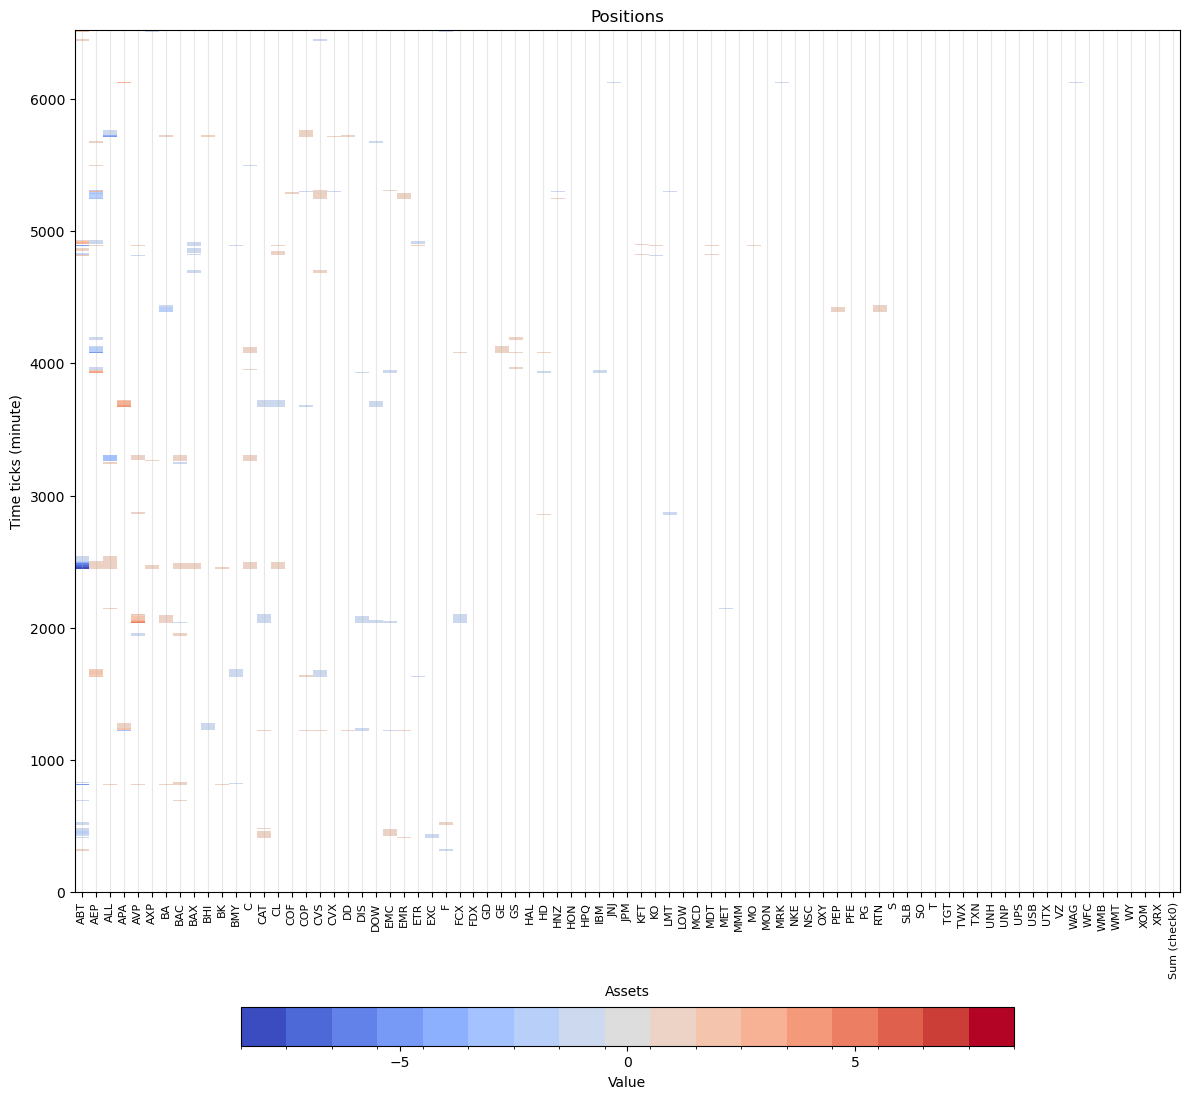

4.5 Strategy statistics
  The strategy processed...
  • 78 assets
  • over a total of 6524 time ticks
  • 21 complete clustering/trading cycles
  • an average of 721 pairs per window
  • resulting in a total of 4542300 pair-timestamp evaluations
4.6 Computing PNL series...


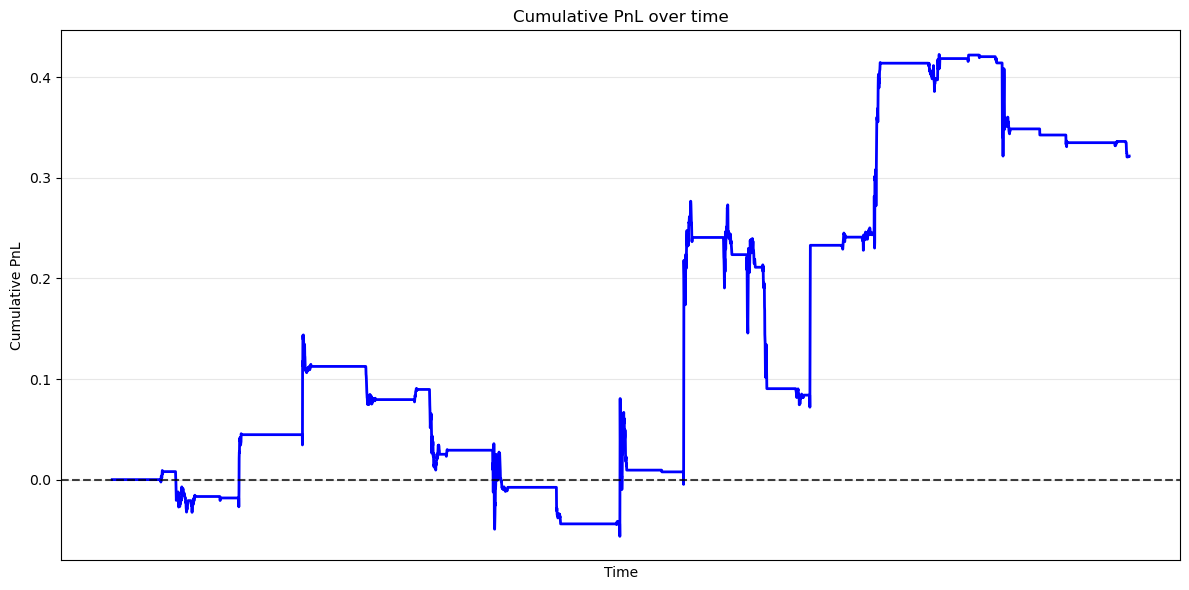


PHASE 4 CORRECTLY TERMINATED



In [1]:
from main_trading import main_4
main_4(window_clustering= 300,
       window_lookback= 50,
       lambda_in = 3,
       lambda_out = 0.5,
       lambda_emergency = 3,
       patience_max = 120,
       use_SUBDATA = True,
       nb_pairs_cap=10,  # Use -1 to use all pairs
       plot_pairs_lifetimes=False,
       display_figures=True)